# A ML/DL Attempt to Identify Changes in Vegetation and Developed Land for Dunhuang City, CN (2016-2020) with Sentinel Imagery and EuroSAT Training Set

*Jiaxuan Lyu (jiaxuan@design.upenn.edu) & Zhijie Zhou (azhou249@design.upenn.edu)*

Final Project Code for MUSA 650: Geospatial Machine Learning in Remote Sensing, Spring 2021




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Import

### EuroSAT Training Set (RGB)
We downloaded 27,000 RGB-version EuroSAT images directly from https://github.com/phelber/EuroSAT as our training set. The EuroSAT images consists of 10 classes which we would like to regroup or adjust for project use. Dimension of each image: 64 X 64 X 3 (RGB).

#### Import EuroSAT Images (Paths)

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path # path processing
import matplotlib.pyplot as plt # plotting 
import PIL # for image processing
import time # for task timing purposes
import os # for system operations

In [5]:
# Load Images From Directories of Each Category
BDIR = '/content/drive/My Drive/MUSA650-Spring2021/MUSA650-Final-Project/EuroSATImg/2750'
print('[INFO] Loading EuroSAT Images (paths) ...')
start = time.time()

ac = Path(BDIR + r"/AnnualCrop")
df1 = pd.DataFrame({'path': list(ac.glob('**/*.jp*g'))})

fo = Path(BDIR + r"/Forest")
df2 = pd.DataFrame({'path': list(fo.glob('**/*.jp*g'))})

hv = Path(BDIR + r"/HerbaceousVegetation")
df3 = pd.DataFrame({'path': list(hv.glob('**/*.jp*g'))})

hw = Path(BDIR + r"/Highway")
df4 = pd.DataFrame({'path': list(hw.glob('**/*.jp*g'))})

ind = Path(BDIR + r"/Industrial")
df5 = pd.DataFrame({'path': list(ind.glob('**/*.jp*g'))})

pas = Path(BDIR + r"/Pasture")
df6 = pd.DataFrame({'path': list(pas.glob('**/*.jp*g'))})

pc = Path(BDIR + r"/PermanentCrop")
df7 = pd.DataFrame({'path': list(pc.glob('**/*.jp*g'))})

res = Path(BDIR + r"/Residential")
df8 = pd.DataFrame({'path': list(res.glob('**/*.jp*g'))})

riv = Path(BDIR + r"/River")
df9 = pd.DataFrame({'path': list(riv.glob('**/*.jp*g'))})

sl = Path(BDIR + r"/SeaLake")
df10 = pd.DataFrame({'path': list(sl.glob('**/*.jp*g'))})

end = time.time()
print('[INFO] Loading EuroSAT Images (paths) took {} seconds'.format(end-start))

[INFO] Loading EuroSAT Images (paths) ...
[INFO] Loading EuroSAT Images (paths) took 36.43276309967041 seconds


In [ ]:
AllClasses = os.listdir(BDIR)
print("The EuroSAT contains {} classes of images: {}".format( len(AllClasses), AllClasses))

The EuroSAT contains 10 classes of images: ['SeaLake', 'Pasture', 'PermanentCrop', 'Residential', 'Industrial', 'HerbaceousVegetation', 'AnnualCrop', 'Highway', 'Forest', 'River']


[INFO] Ploting out EuroSAT image samples ...
[INFO] Ploting out EuroSAT image samples took 5.589399814605713 seconds


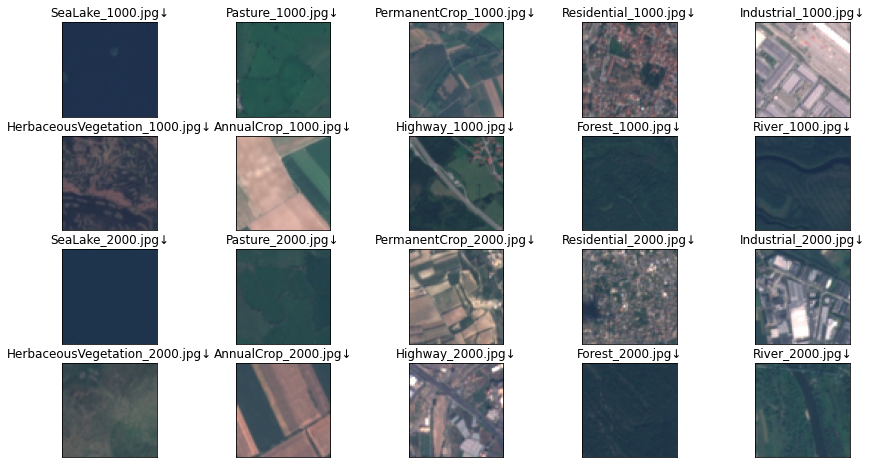

In [ ]:
# Plot out EuroSAT image samples
print('[INFO] Ploting out EuroSAT image samples ...')
start = time.time()

sample_img_paths = [os.path.join(BDIR, l, l+'_1000.jpg') for l in AllClasses]

sample_img_paths = sample_img_paths + [os.path.join(BDIR, l, l+'_2000.jpg') for l in AllClasses]

def plot_sat_imgs(paths):
    plt.figure(figsize=(15, 8))
    for i in range(0, 20):
        plt.subplot(4, 5, i+1, xticks=[], yticks=[])
        img = PIL.Image.open(paths[i], 'r')
        plt.imshow(np.asarray(img))
        plt.title(paths[i].split('/')[-1]+'↓') # to display the category of each image as their titles

# sample_img_paths
plot_sat_imgs(sample_img_paths)

end = time.time()
print('[INFO] Ploting out EuroSAT image samples took {} seconds'.format(end-start))

In [ ]:
# Label Images
print('[INFO] Labeling EuroSAT Images ...')
start = time.time()

# AnnualCrop
df1["category"] = "AnnualCrop"
df1["label"] = 0
# Forest
df2["category"] = "Forest"
df2["label"] = 1
# HerbaceousVegetation
df3["category"] = "HerbaceousVegetation"
df3["label"] = 2
# Highway
df4["category"] = "Highway"
df4["label"] = 3
# Industrial
df5["category"] = "Industrial"
df5["label"] = 4
# Pasture
df6["category"] = "Pasture"
df6["label"] = 5
# PermanentCrop
df7["category"] = "PermanentCrop"
df7["label"] = 6
# Residential
df8["category"] = "Residential"
df8["label"] = 7
# River
df9["category"] = "River"
df9["label"] = 8
# SeaLake
df10["category"] = "SeaLake"
df10["label"] = 9

end = time.time()
print('[INFO] Labeling EuroSAT Images took {} seconds'.format(end-start))

[INFO] Labeling EuroSAT Images ...
[INFO] Labeling EuroSAT Images took 0.018139362335205078 seconds


In [ ]:
# Integrate the full dataset
print('[INFO] Integrating the full dataset ...')
start = time.time()

EuroSAT = pd.DataFrame().append([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10])

end = time.time()
print('[INFO] Integrating the full dataset took {} seconds'.format(end-start))
print(EuroSAT.tail())

[INFO] Integrating the full dataset ...
[INFO] Integrating the full dataset took 0.008075475692749023 seconds
                                                   path category  label
2995  /content/drive/My Drive/MUSA650-Spring2021/MUS...  SeaLake      9
2996  /content/drive/My Drive/MUSA650-Spring2021/MUS...  SeaLake      9
2997  /content/drive/My Drive/MUSA650-Spring2021/MUS...  SeaLake      9
2998  /content/drive/My Drive/MUSA650-Spring2021/MUS...  SeaLake      9
2999  /content/drive/My Drive/MUSA650-Spring2021/MUS...  SeaLake      9


### Sentinel-2 Images for Dunhuang, CN
This project involved a land cover classification and change detection workflow for two Sentinel-1C images of Dunhuang Oasis in Summer 2016 and Summer 2020, retrieved using Google Earth Engine scripts at 10-meter resolution. The final image products downloaded were monthly averaged and cloud-masked (using the QA bands, i.e. band 10 and 11) with RGB (visible) bands only.

#### Import Satellite Images

In [3]:
!pip install rasterio

     |████████████████████████████████| 19.1MB 225kB/s 


In [6]:
import rasterio
import tifffile as tiff

In [9]:
# Hard coded paths and vars
BDIR = '/content/drive/My Drive/MUSA650-Spring2021/MUSA650-Final-Project' # for google colab use
IMGDIR = BDIR + '/Image'
IMGID1 = 'dunhuang_20160801_20160831_10m'
IMGID2 = 'dunhuang_20200801_20200831_10m'
BANDS = ['B4', 'B3', 'B2'] #  R G B

In [10]:
# function to read in individual bands and integrate them into full RGB images
def imageRead(IMGID):
  with rasterio.open(IMGDIR + '/' + IMGID + '_' + BANDS[0] + '.tif') as f:
    print('Reading band: 1 ' + BANDS[0])
    tmpImg = f.read(1)
  imgMat = np.zeros([tmpImg.shape[0], tmpImg.shape[1], len(BANDS)])
  imgMat[:,:,0] = tmpImg

  for i, tmpB in enumerate(BANDS[1:]):
    print('Reading band: ' + str(i+2) + ' ' + tmpB)
    with rasterio.open(IMGDIR + '/' + IMGID + '_' + tmpB + '.tif') as f:
      imgMat[:,:,i+1] = f.read(1)
  imgMat = imgMat.astype(np.float32)
  return imgMat

In [11]:
# Loading satellite images
print('[INFO] Loading satellite images ...')
start = time.time()

dunhuang_16 = imageRead(IMGID1)
dunhuang_20 = imageRead(IMGID2)

end = time.time()
print('[INFO] Loading satellite images took {} seconds'.format(end-start))

[INFO] Loading satellite images ...
Reading band: 1 B4
Reading band: 2 B3
Reading band: 3 B2
Reading band: 1 B4
Reading band: 2 B3
Reading band: 3 B2
[INFO] Loading satellite images took 23.98916745185852 seconds


In [13]:
tmp_shape = dunhuang_16.shape
print('Dimension of each satellite image: {} X {} X {}'.format(tmp_shape[0], tmp_shape[1], tmp_shape[2]))

Dimension of each satellite image: 5014 X 6124 X 3


In [12]:
dunhuang_20

array([[[      nan,       nan,       nan],
        [      nan,       nan,       nan],
        [      nan,       nan,       nan],
        ...,
        [      nan,       nan,       nan],
        [      nan,       nan,       nan],
        [      nan,       nan,       nan]],

       [[      nan,       nan,       nan],
        [      nan,       nan,       nan],
        [      nan,       nan,       nan],
        ...,
        [      nan,       nan,       nan],
        [      nan,       nan,       nan],
        [      nan,       nan,       nan]],

       [[      nan,       nan,       nan],
        [      nan,       nan,       nan],
        [      nan,       nan,       nan],
        ...,
        [      nan,       nan,       nan],
        [      nan,       nan,       nan],
        [      nan,       nan,       nan]],

       ...,

       [[0.2265875, 0.19905  , 0.1869125],
        [0.2265875, 0.19905  , 0.1869125],
        [0.22675  , 0.1985875, 0.1867   ],
        ...,
        [0.2568   , 0.2158

Note that the images contained some nan values. We could either remove them or set their values as 0. Besides, the channel values of each pixel were represented in ratios ranging from 0 to 1. We should rescale them for future classification purposes (in accordance with the EuroSAT images)

In [14]:
# function to rescale the satellite images
def scaleImgPerc(imgIn):
    w, h, d = imgIn.shape
    imgIn = np.reshape(imgIn, [w * h, d]).astype(np.float32)
    # Get 1st and 99th percentile to remove noises
    mins = np.percentile(imgIn, 1, axis=0)
    maxs = np.percentile(imgIn, 99, axis=0) - mins
    imgIn = (imgIn - mins[None, :]) / maxs[None, :]
    imgIn = np.reshape(imgIn, [w, h, d])
    imgIn = (imgIn.clip(0, 1) * 255).astype(np.uint8)
    return imgIn

In [15]:
# Rescale both 2016 and 2020 satellite images
print('[INFO] Rescaling both 2016 and 2020 satellite images ...')
start = time.time()

dunhuang_16_sc = np.nan_to_num(dunhuang_16) # np.nan_to_num will convert NaN values to zeroes
dunhuang_16_sc = scaleImgPerc(dunhuang_16_sc)
dunhuang_20_sc = np.nan_to_num(dunhuang_20)
dunhuang_20_sc = scaleImgPerc(dunhuang_20_sc)

end = time.time()
print('[INFO] Rescaling both 2016 and 2020 satellite images took {} seconds'.format(end-start))

[INFO] Rescaling both 2016 and 2020 satellite images ...
[INFO] Rescaling both 2016 and 2020 satellite images took 8.051701068878174 seconds


In [16]:
dunhuang_20_sc

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[154, 157, 168],
        [154, 157, 168],
        [154, 156, 168],
        ...,
        [185, 183, 185],
        [185, 183, 185],
        [207, 208, 209]],

       [[152, 154, 166],
        [152, 154, 166],
        [153, 154, 165],
        ...,
        [188, 188, 194],
        [188, 188, 194],
        [219, 227, 227]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

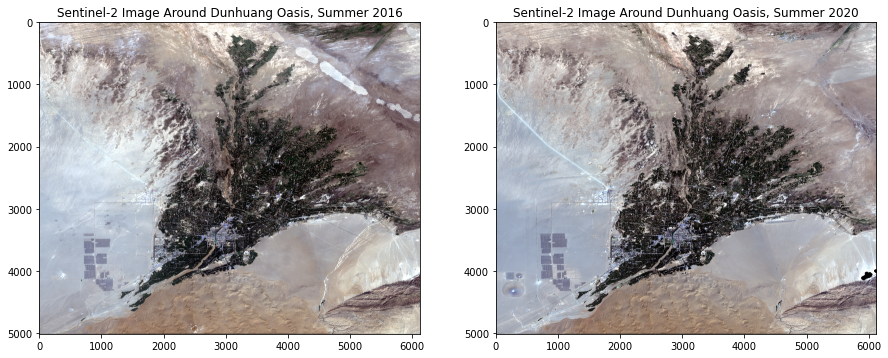

In [14]:
plt.figure(figsize=(15, 15))
tmp_img_group = [dunhuang_16_sc, dunhuang_20_sc]
for i in range(0, 2):
    plt.subplot(1, 2, i+1)
    plt.imshow(tmp_img_group[i])
    if i == 0:
      plt.title('Sentinel-2 Image Around Dunhuang Oasis, Summer 2016')
    else:
      plt.title('Sentinel-2 Image Around Dunhuang Oasis, Summer 2020')

### Image Pre-classification Processing

#### Vectorizing Image

In [17]:
# Dimension measurements for satellite image
n_spectrum = 3
width = dunhuang_20_sc.shape[1] # 6124 px
height = dunhuang_20_sc.shape[0] # 5014 px
print(width, height)

6124 5014


In [18]:
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(dunhuang_20_sc[y, x][chanel])

In [19]:
picture_vector = np.array(picture_vector).astype('uint8')
picture_vector

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [20]:
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)
picture_tensor

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[154, 157, 168],
        [154, 157, 168],
        [154, 156, 168],
        ...,
        [185, 183, 185],
        [185, 183, 185],
        [207, 208, 209]],

       [[152, 154, 166],
        [152, 154, 166],
        [153, 154, 165],
        ...,
        [188, 188, 194],
        [188, 188, 194],
        [219, 227, 227]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [21]:
picture_tensor.shape

(5014, 6124, 3)

In [22]:
picture_tensor = picture_tensor.transpose(2,0,1)

In [23]:
picture_tensor.shape

(3, 5014, 6124)

#### Cutting Image

In [ ]:
import os
import sys
import tensorflow as tf
from tensorflow import keras

In [ ]:
def cutting(x, y):
    area_study = np.arange(3*64*64).reshape(3, 64, 64)
    for i in range(64):
        for j in range(64):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 64, 64])
    area_study = area_study.transpose([0,2,3,1])
    # area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study

In [ ]:
cut_area_2020 = []
# Cutting image
step = 64; coordinates = []
for y in range(int((height-(64-step))/step)):
    for x in range(int((width-(64-step))/step)):
        cut_area_2020.append([cutting(x*step, y*step), [x*step, y*step]]) # each element in the array cut_area_2020 is composed of its RGB image pixel values ([0]) and its left-top coordinates ([1])

X:6016 Y:4928  

In [ ]:
cut_area_2020[2][0].shape

(1, 64, 64, 3)

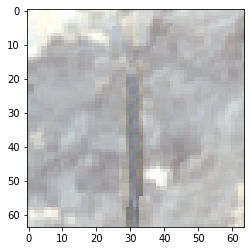

In [ ]:
plt.imshow(cut_area_2020[4210][0].reshape(64,64,3))

In [ ]:
print("We split the original satellite image into {} patches. Each patch has a dimension of 64 X 64 X 3(RGB).".format(len(cut_area_2020)))

We split the original satellite image into 7410 patches. Each patch has a dimension of 64 X 64 X 3(RGB).


## Unsupervised Clustering

In [24]:
from sklearn.cluster import KMeans
from matplotlib import colors

In [38]:
def KMeans_4_Cluster(img):
  
  w, h, d = img.shape
  imgVec = np.reshape(img, [w * h, d])
  kVals = KMeans(n_clusters=4, random_state=0).fit(imgVec)
  lImg = kVals.labels_.reshape([w, h])

  fig, ax = plt.subplots(1, 2, figsize=[24,24])
  cmap = colors.ListedColormap(['y', 'b', 'r', 'g']) #4 classes
  # ax[0].imshow(imgMatScCrop[:,:,0])
  ax[0].imshow(img[:,:,0],cmap='gray', interpolation='nearest')
  p = ax[1].imshow(lImg, cmap=cmap)
  cbar = fig.colorbar(p, ax=ax[1], fraction=0.046, pad=0.04, ticks=np.arange(1,5))
  cbar.ax.set_yticklabels(['1','2','3','4'])

  return lImg

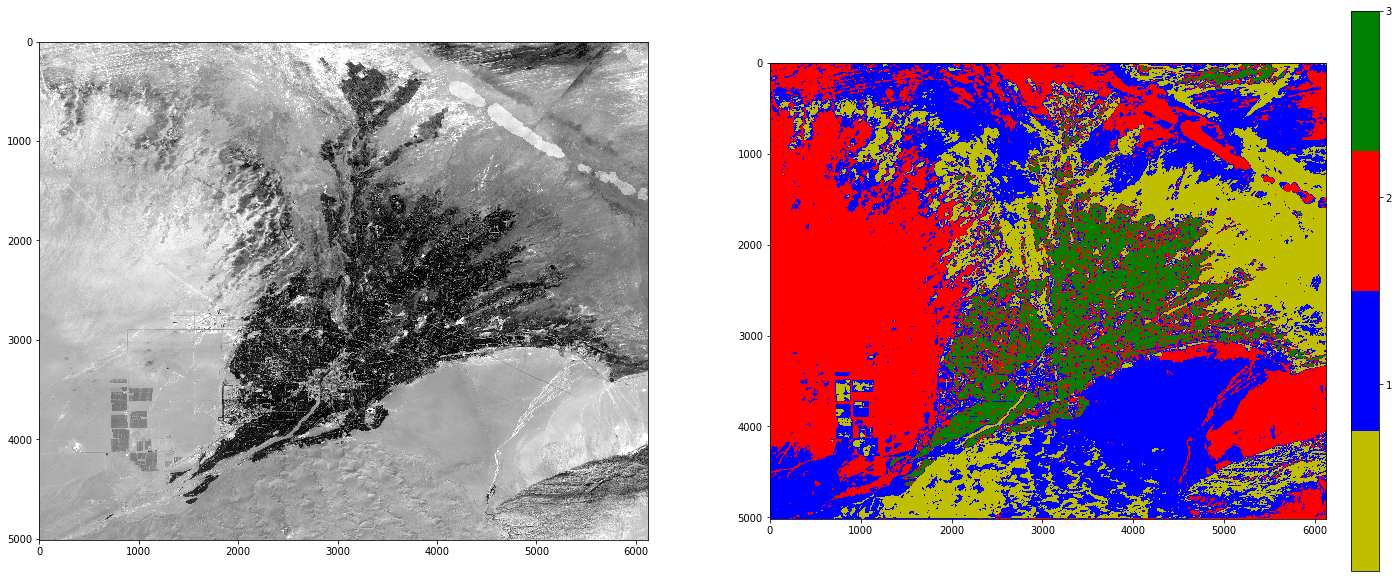

In [39]:
cluster_16 = KMeans_4_Cluster(dunhuang_16_sc)

Guesses for clusters:

Class 0 (dark yellow): Sand/Barren land/Rock

Class 1 (blue): Builtup/Barren land

Class 2 (red): Sand

Class 3 (green): Greenery Cover

In [40]:
cluster_16

array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [3, 3, 3, ..., 3, 3, 3]], dtype=int32)

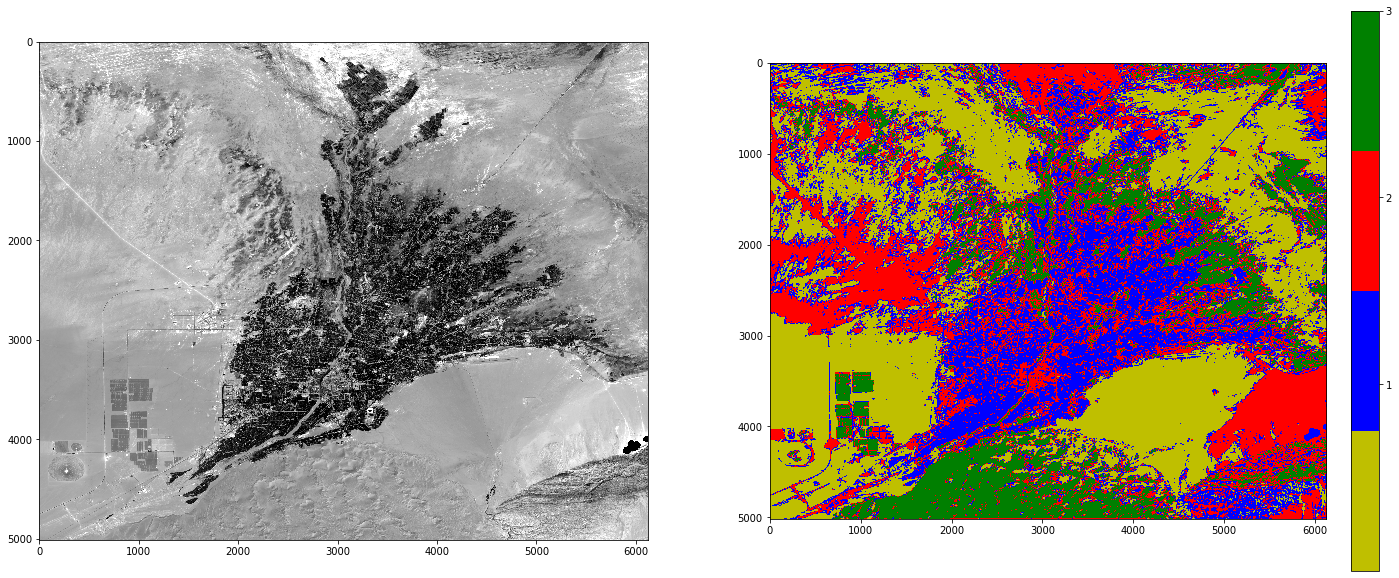

In [41]:
cluster_20 = KMeans_4_Cluster(dunhuang_20_sc)

In [45]:
# Adjust the clustering class difference between 2016 and 2020 images (need to adjust the classes each time running the script )
cluster_20_new = np.zeros([cluster_20.shape[0],cluster_20.shape[1]])
for i in range(0, cluster_20.shape[0]):
  for j in range(0, cluster_20.shape[1]):
    if (cluster_20[i][j] == 3):
      cluster_20_new[i][j] = 0
    elif (cluster_20[i][j] == 1):
      cluster_20_new[i][j] = 3
    elif (cluster_20[i][j] == 0):
      cluster_20_new[i][j] = 2
    else: # 2 = 2 classes are same
      cluster_20_new[i][j] = cluster_20[i][j]

KeyboardInterrupt: ignored

In [51]:
pos3_0 = np.where(cluster_20.flatten()==3)
pos1_3 = np.where(cluster_20.flatten()==1)
pos0_1 = np.where(cluster_20.flatten()==0)
pos2_2 = np.where(cluster_20.flatten()==2)

In [52]:
pos2_2

(array([    1749,     1750,     1751, ..., 30699609, 30699610, 30699611]),)

In [55]:
cluster_20.shape

(5014, 6124)

In [54]:
# Adjust the clustering class difference between 2016 and 2020 images (need to adjust the classes each time running the script )
cluster_20_new = np.zeros([cluster_20.shape[0],cluster_20.shape[1]])
flatten = cluster_20_new.flatten()
flatten[pos3_0] = 0
flatten[pos1_3] = 3
flatten[pos0_1] = 1
flatten[pos2_2] = 2

In [56]:
cluster_20_new = flatten.reshape(5014, 6124)

[Text(1, 0, '1'), Text(1, 0, '2'), Text(1, 0, '3'), Text(1, 0, '4')]

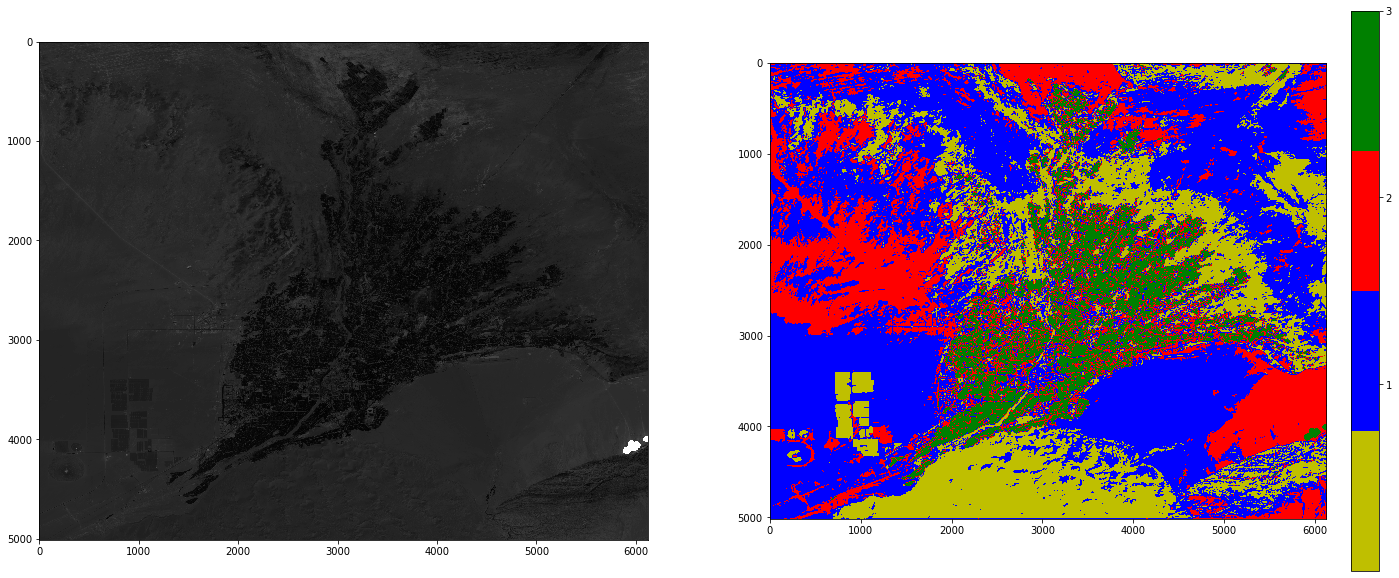

In [58]:
  fig, ax = plt.subplots(1, 2, figsize=[24,24])
  cmap = colors.ListedColormap(['y', 'b', 'r','g']) #4 classes
  # ax[0].imshow(imgMatScCrop[:,:,0])
  ax[0].imshow(dunhuang_20[:,:,0],cmap='gray', interpolation='nearest')
  p = ax[1].imshow(cluster_20_new, cmap=cmap)
  cbar = fig.colorbar(p, ax=ax[1], fraction=0.046, pad=0.04, ticks=np.arange(1,5))
  cbar.ax.set_yticklabels(['1','2','3','4'])

## ML/DL Classifier Training

### Data Preprocessing

 #### Regroup EuroSAT Labels

In [ ]:
# Forest Or Residential?
df = EuroSAT
df['CAT']= 0

SEL_LABEL1 = 'Forest'
df.loc[df.category==SEL_LABEL1, 'CAT'] = 1
SEL_LABEL2 = 'Residential'
df.loc[df.category==SEL_LABEL2, 'CAT'] = 2
print('[FACT] The EuroSAT data contains {} {} images, {} {} images, and {} other images.'.
      format(np.sum(df.CAT==1), SEL_LABEL1, np.sum(df.CAT==2), SEL_LABEL2, np.sum(df.CAT==0)))

[FACT] The EuroSAT data contains 3000 Forest images, 3000 Residential images, and 21000 other images.


#### Training/Testing Split

In [ ]:
X_data = df["path"]
y_data = df["CAT"].values

# Split the data into training (60%) and testing sets (40%)
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X_data, y_data, train_size=0.6, random_state=42)
print('[FACT] The training set contains {} images and the testing set contains {} images.'.format(X_train.shape[0], y_test.shape[0]))
print('[FACT] Percentage of {} images: {} of training set and {} of test set.'.format(SEL_LABEL1, np.sum(y_train==1)/y_train.shape[0],  np.sum(y_test==1)/y_test.shape[0]))
print('[FACT] Percentage of {} images: {} of training set and {} of test set. '.format(SEL_LABEL2, np.sum(y_train==2)/y_train.shape[0],  np.sum(y_test==2)/y_test.shape[0]))

[FACT] The training set contains 16200 images and the testing set contains 10800 images.
[FACT] Percentage of Forest images: 0.11135802469135803 of training set and 0.11074074074074074 of test set.
[FACT] Percentage of Residential images: 0.10950617283950617 of training set and 0.11351851851851852 of test set. 


#### Load EuroSAT Images (with vectorizing)

In [ ]:
from skimage.color import rgb2gray

In [ ]:
#Read all images in the training dataset and convert the data into matrix

#get the shape of image (as sample)
img1 = imread(df1.path[0])
img1_gray = rgb2gray(img1)
img1_vec = img1_gray.flatten()

dvec = img1_vec.shape[0]

n = X_train.shape[0]

mat_1D_train = np.zeros([n, dvec])

#loop
for i, tmpPath in enumerate(X_train.values):
    img_rgb_All = imread(tmpPath)
    img_gray_All = rgb2gray(img_rgb_All)
    img_vec_All = img_gray_All.flatten()
    mat_1D_train[i, :] = img_vec_All

In [ ]:
mat_1D_train.shape

In [ ]:
#Read all images in the training dataset and convert the data into matrix

mat_1D_test = np.zeros([n, dvec])

#loop
for i, tmpPath in enumerate(X_test.values):
    img_rgb_All = imread(tmpPath)
    img_gray_All = rgb2gray(img_rgb_All)
    img_vec_All = img_gray_All.flatten()
    mat_1D_test[i, :] = img_vec_All

In [ ]:
mat_1D_test.shape

#### Load EuroSAT Images (without vectorizing)

In [ ]:
from skimage.io import imread

In [ ]:
# read training images without vectorize them
print('[INFO] Read training images without vectorizing ...')
start = time.time()

num = X_train.shape[0]
dim_train = np.zeros([num, 64, 64, 3])

#loop
for i, tmpPath in enumerate(X_train.values):
    img_rgb_train = imread(tmpPath)
    dim_train[i, :, :, :] = img_rgb_train

end = time.time()
print('[INFO] Read training images without vectorizing took {} seconds.'.format(end-start))

[INFO] Read training images without vectorizing ...


KeyboardInterrupt: ignored

In [ ]:
#read test images without vectorize them
print('[INFO] Read test images without vectorizing ...')
start = time.time()

num = X_test.shape[0]
dim_test = np.zeros([num, 64, 64, 3])

#loop
for i, tmpPath in enumerate(X_test.values):
    img_rgb_test = imread(tmpPath)
    dim_test[i, :, :, :] = img_rgb_test
    
end = time.time()
print('[INFO] Read test images without vectorizing took {} seconds.'.format(end-start))

In [ ]:
# change labels to categorical
print('[INFO] Change labels to categorical ...')
start = time.time()

from keras.utils import to_categorical
y_train_labels = to_categorical(y_train)
y_test_labels = to_categorical(y_test)

end = time.time()
print('[INFO] Change labels to categorical took {} seconds'.format(end-start))

### Machine Learning Approach

#### SVM Classifier

In [ ]:
from sklearn.svm import SVC
svc=SVC()

In [ ]:
#train the model
svc.fit(mat_1D_train, y_train)

In [ ]:
#Training accuracy
y_pred_train = svc.predict(mat_1D_train)

In [ ]:
from sklearn.metrics import accuracy_score
print ('Training accuracy =', accuracy_score(y_train, y_pred_train))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

In [ ]:
#testing accuracy
y_pred_test = svc.predict(mat_1D_test)

In [ ]:
from sklearn.metrics import accuracy_score
print ('Testing accuracy =', accuracy_score(y_test, y_pred_test))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

### Deep Learning Approach

####  Transfer Learning-Adjusted VGG16 Classifier

In [ ]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.applications import VGG16
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, fbeta_score, accuracy_score

INPUT_SHAPE = (64, 64, 3)
NUM_CLASSES = 3

# Add setup of dense layers to adjust the original VGG16 Model
def compile_model(cnn_base, input_shape, n_classes, optimizer, fine_tune=None):
    
    conv_base = VGG16(include_top=False,
                      weights='imagenet', 
                      input_shape=input_shape)
    top_model = conv_base.output
    top_model = Flatten()(top_model)
    top_model = Dense(2048, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(2048, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    model = Model(inputs=conv_base.input, outputs=output_layer)
        
    if type(fine_tune) == int:
        for layer in conv_base.layers[fine_tune:]:
            layer.trainable = True
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    model.compile(optimizer=optimizer, loss='categorical_crossentropy',
                 metrics=['categorical_accuracy'])
    
    return model

In [ ]:
vgg16_model = compile_model('VGG16', INPUT_SHAPE, NUM_CLASSES, Adam(lr=1e-2), fine_tune=None)
# vgg16_model.summary()

In [ ]:
print('[INFO] Adjusted-VGG16 Model Training ...')
start = time.time()

vgg16_model.fit(dim_train, y_train_labels,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(dim_test, y_test_labels))

end = time.time()
print('[INFO] Adjusted-VGG16 Model Training took {} seconds'.format(end-start))

## Image Classification
More examples can be found in https://github.com/zjalexzhou/Dunhuang_Sentinel_EuroSat/blob/main/ImageClassification_DL.ipynb

In [ ]:
# modelvgg = tf.keras.models.load_model('/content/drive/My Drive/MUSA650-Spring2021/MUSA650-Final-Project/saved_model/EuroSAT_vgg_16_new_class_adjusted')

# Check its architecture
vgg16_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0   

In [ ]:
from keras.utils import plot_model
plot_model(vgg16_model, show_shapes=True, show_layer_names=True)

In [ ]:
# try predicting land cover at one patch
vgg16_model.predict(cut_area_2020[3545][0])

array([[0.01200595, 0.977076  , 0.01091806]], dtype=float32)

In [ ]:
len(cut_area_2020)

7410

In [ ]:
import time
print('[INFO] Predict Land Cover Type ...')
start = time.time()

coord_PermVeg = []
coord_BuiltUp = []
result_prob = np.zeros([len(cut_area_2020), 3])
result_class = np.zeros([len(cut_area_2020), 1])

for i in range(int(len(cut_area_2020))):
  result_prob[i] = vgg16_model.predict(cut_area_2020[i][0])
  if result_prob[i][1] > 0.90:
    result_class[i][0] = 1
  elif result_prob[i][2] > 0.90:
    result_class[i][0] = 2
  else:
    result_class[i][0] = 0
end = time.time()
print('[INFO] Predict Land Cover Type took {}.'.format(end-start)) 

[INFO] Predict Land Cover Type ...
[INFO] Predict Land Cover Type took 266.85984325408936.


In [ ]:
result_prob[1232]

array([0.97253418, 0.01413241, 0.01333348])

In [ ]:
np.sum(result_class==1)

3526

In [ ]:
result_class

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
# function to show classification results (marking individual patches)
def show_result(x, y, thickness=5):   
    for i in range(64):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(64):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+64] = -1
        
    for i in range(64):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(64):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+64][x+i] = -1

In [ ]:
coord_PermVeg = []
coord_BuiltUp = []
i = 0;
for e in result_class_16_vgg:
  if e[0] == 1:
    coord_BuiltUp.append(cut_area_2016[i][1])
  elif e[0] == 2:
    coord_PermVeg.append(cut_area_2016[i][1])
  i += 1;

In [ ]:
#picture_tensor = picture_tensor.transpose(2,0,1)
# adjust tensors for plotting
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape

In [ ]:
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
import matplotlib.patches as mpatches

In [ ]:

plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

currentAxis = plt.gca()
for i in coord_BuiltUp:
  currentAxis.add_patch(Rectangle((i[0], i[1]), 64, 64, fill=None, alpha=1, color="red"))

for i in coord_PermVeg:
  currentAxis.add_patch(Rectangle((i[0], i[1]), 64, 64, fill=None, alpha=1, color="blue"))

#add legend:https://stackoverflow.com/questions/39500265/manually-add-legend-items-python-matplotlib
red_patch = mpatches.Patch(color='red', label='Built Up')
blue_patch = mpatches.Patch(color='blue', label='Green Cover')

plt.legend(handles=[red_patch, blue_patch])

plt.title("Image Classification Result by Using Deep Learning Model", fontsize=20)
plt.show()

## Normalized Difference Vegetation Index (NDVI)

In [42]:
import xarray as xr

In [ ]:
#Path of satellite images
#B4: Red B8: NIR
path16_R = IMGDIR + "/dunhuang_20160801_20160831_10m_B4.tif"
path16_NIR = IMGDIR + "/dunhuang_20160801_20160831_B8_10m.tif"

path20_R = IMGDIR + "/dunhuang_20200801_20200831_10m_B4.tif"
path20_NIR = IMGDIR + "/dunhuang_20200801_20200831_B8_10m.tif"

In [ ]:
tmpImg16_R = xr.open_rasterio(path16_R)
temImg16_NIR = xr.open_rasterio(path16_NIR)

temImg20_R = xr.open_rasterio(path20_R)
temImg20_NIR = xr.open_rasterio(path20_NIR)

In [ ]:
def calculate_NDVI(nir, red):
    """
    Calculate the NDVI from the NIR and red landsat bands
    """
    
    # Convert to floats
    nir = nir.astype(float)
    red = red.astype(float)
    
    # Where the check is True, return the NDVI, else return NaN
    ndvi = (nir - red ) / ( nir + red )
    return ndvi

In [ ]:
NDVI_16 = calculate_NDVI(temImg16_NIR, tmpImg16_R)

In [ ]:
NDVI_16.shape

In [ ]:
# transpose for plotting
NDVI16_p = NDVI_16.T

In [ ]:
NDVI16_p = NDVI_16.T

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))

# Plot NDVI (2016)
img = ax.imshow(NDVI16_p.squeeze())
plt.colorbar(img,ax=ax)
ax.set_axis_off()
ax.set_title("NDVI in Dunhuang, year 2016", fontsize=24);
plt.gca().invert_yaxis();
plt.gca().invert_xaxis();
plt.show();

In [ ]:
NDVI_20 = calculate_NDVI(temImg20_NIR, temImg20_R)
NDVI20_p = NDVI_20.T
fig, ax = plt.subplots(figsize=(15,15))

# Plot NDVI (2020)
img = ax.imshow(NDVI20_p.squeeze())
plt.colorbar(img,ax=ax)
ax.set_axis_off()
ax.set_title("NDVI in Dunhuang, year 2020", fontsize=24);
plt.gca().invert_yaxis();
plt.gca().invert_xaxis();
plt.show();

In [ ]:
# Calculate NDVI Difference
Diff_NDVI = NDVI20_p - NDVI16_p

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))

# Plot NDVI Difference
img = ax.imshow(Diff_NDVI.squeeze())
plt.colorbar(img,ax=ax)
ax.set_axis_off()
ax.set_title("NDVI Difference in Dunhuang, from year 2016 to year 2020", fontsize=24);
plt.gca().invert_yaxis();
plt.gca().invert_xaxis();
plt.show();

## Change Detection

Now that we have both satellite images classified, the change detection workflow is straightforward. However, due to the unsatisfying performance of the VGG16-based image classification we have seen so far, we would present the change detection results of clustering.

### Land Cover Type Transition

This is an example of a simple transition matrix (elements) calculation. Though it is not related to the content of this project, the method we applied to detect the potential changes in land cover types were similar. 

In [ ]:
matA = np.asarray([2,1,2,0,1,2,2,1,2])
matB = np.asarray([1,2,0,1,2,1,1,0,2])
type1 = 1
type2 = 2

In [ ]:
posA1 = np.where(matA.flatten()==type1)
print("Patches {} of matrix A are type {}".format(posA1, type1))
posA2 = np.where(matA.flatten()==type2)
print("Patches {} of matrix A are type {}".format(posA2, type2))

Patches (array([1, 4, 7]),) of matrix A are type 1
Patches (array([0, 2, 5, 6, 8]),) of matrix A are type 2


In [ ]:
posB1 = np.where(matB.flatten()==type1)
print("Patches {} of matrix B are type {}".format(posB1, type1))
posB2 = np.where(matB.flatten()==type2)
print("Patches {} of matrix B are type {}".format(posB2, type2))

Patches (array([0, 3, 5, 6]),) of matrix B are type 1
Patches (array([1, 4, 8]),) of matrix B are type 2


In [ ]:
numOfChange1To2 = np.intersect1d(posA1,posB2).size
numOfChange2To1 = np.intersect1d(posB1,posA2).size
print("{} patches changed from type {} to type {}.".format(numOfChange1To2,type1,type2))
print("{} patches changed from type {} to type {}.".format(numOfChange2To1,type2,type1))

2 patches changed from type 1 to type 2.
3 patches changed from type 2 to type 1.


In [59]:
# indexes for each clustering class
posA0 = np.where(cluster_16.flatten()==0)
posA1 = np.where(cluster_16.flatten()==1)
posA2 = np.where(cluster_16.flatten()==2)
posA3 = np.where(cluster_16.flatten()==3)

posB0 = np.where(cluster_20.flatten()==0)
posB1 = np.where(cluster_20.flatten()==1)
posB2 = np.where(cluster_20.flatten()==2)
posB3 = np.where(cluster_20.flatten()==3)

In [62]:
# total number of pixels in each image
cluster_20.flatten().shape[0]

30705736

RECALL: Guesses for clusters:

Class 0 (dark yellow): Sand/Barren land/Rock

Class 1 (blue): Builtup/Barren land

Class 2 (red): Sand

Class 3 (green): Greenery Cover

In [68]:
numOfChange3To1 = np.intersect1d(posA3,posB1).size
percent3To1 = round((numOfChange3To1 / cluster_20.flatten().shape[0]) *100, 3)
numOfChange1To3 = np.intersect1d(posA1,posB3).size
percent1To3 = round((numOfChange1To3  / cluster_20.flatten().shape[0]) *100, 3)
print("{} pixels ({}%) changed from Greenery Cover to Builtup/Barren land.".format(numOfChange3To1, percent3To1))
print("{} pixels ({}%）changed from Builtup/Barren land to Greenery Cover.".format(numOfChange1To3, percent1To3))

3352533 pixels (10.918%) changed from Greenery Cover to Builtup/Barren land.
1961945 pixels (6.39%）changed from Builtup/Barren land to Greenery Cover.


In [69]:
numOfChange3To2 = np.intersect1d(posA3,posB2).size
numOfChange3To0 = np.intersect1d(posA3,posB0).size
numOfChange3ToOther = numOfChange3To2+numOfChange3To0
percent3ToOther = round((numOfChange3ToOther / cluster_20.flatten().shape[0]) *100, 3)
numOfChange2To3 = np.intersect1d(posA2,posB3).size
numOfChange0To3 = np.intersect1d(posA0,posB3).size
numOfChangeOtherTo3 = numOfChange2To3+numOfChange0To3
percentOtherTo3 = round((numOfChangeOtherTo3 / cluster_20.flatten().shape[0]) *100, 3)
print("{} pixels ({}%) changed from Greenery Cover to Other (not including builtup).".format(numOfChange3ToOther, percent3ToOther))
print("{} pixels ({}%）changed from Other (not including builtup) to Greenery Cover.".format(numOfChangeOtherTo3, percentOtherTo3))

109568 pixels (0.357%) changed from Greenery Cover to Other (not including builtup).
4240505 pixels (13.81%）changed from Other (not including builtup) to Greenery Cover.
